In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
# https://drive.google.com/drive/folders/1sGLY_TtzpyKNHErF-a24xOzgqunUhyeR

df_data = pd.read_csv('/content/u.data', sep = '\t', header = None)
df_data = df_data.rename(columns = {0:'user id', 1:'movie id', 2:'rating', 3:'timestamp'})

df_item = pd.read_csv('/content/u.item', sep = '|',  header = None, encoding = 'latin-1')
df_item = df_item.rename(columns = {0 : 'movie id', 1: 'movie title' , 2 :  'release date', 3 : 'video release date',
              4 : 'IMDb URL', 5 :  'unknown' , 6 : 'Action', 7 :  'Adventure', 8  :'Animation',
              9 : "Children's", 10 :  'Comedy', 11 : 'Crime', 12 : 'Documentary', 13 : 'Drama', 14 : 'Fantasy',
              15 : 'Film-Noir', 16 :  'Horror', 17 :  'Musical', 18 :  'Mystery', 19 : 'Romance', 20 :  'Sci-Fi',
              21 : 'Thriller', 22 : 'War', 23 :  'Western'  })

df_user = pd.read_csv('/content/u.user', sep = '\|', header = None)
df_user = df_user.rename(columns = {0:'user id', 1:'age', 2:'gender', 3:'occupation', 4:'zip code'})


<ipython-input-1-04b0a422fd97>:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_user = pd.read_csv('/content/u.user', sep = '\|', header = None)


In [ ]:
# df_item에 rating_counts 추가시켜주기
# df_data에서 각 영화별로 평점 갯수를 확인한 뒤
# movie id 기준, merge로 df_item과 합치기

df_rating_counts = df_data[['movie id', 'rating']].groupby(['movie id']).count()
df_item = df_item.merge(df_rating_counts, on = 'movie id')
df_item = df_item.rename(columns = {'rating' : 'rating_counts'})


df_item

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_counts
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,452
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,131
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,90
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,209
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# df_item 에서 평점 갯수 100개 이상인 것만 뽑아내기

df_item[df_item['rating_counts'] >= 100]

# 원본에 저장!
df_item_only_100 = df_item[df_item['rating_counts'] >= 100]


# df_item 중에서 평점 갯수가 100개 이상인 영화들만 남겨두기
df_item_only_100 # 영화 총 338개


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_counts
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,452
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,131
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,209
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,392
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,928,"Craft, The (1996)",26-Apr-1996,NaN,"http://us.imdb.com/M/title-exact?Craft,%20The%...",0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,104
1011,1012,Private Parts (1997),07-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Private%20Par...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
1015,1016,Con Air (1997),06-Jun-1997,NaN,http://us.imdb.com/M/title-exact?Con%20Air%20%...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,137
1027,1028,Grumpier Old Men (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Grumpier%20Ol...,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,148


In [ ]:
# df_data에서 20~30대 평점만 남기기


# df_user에서 20~30대 뽑아보기
df_user_age2030 = df_user[(df_user['age'] >= 20) & (df_user['age'] < 40)]

# df_user_age2030과 df_data를 user id 기준으로 머지를 통해 합치기
df_data.merge(df_user_age2030, on = 'user id')

# 원본에 저장!
df_data_age2030 = df_data.merge(df_user_age2030, on = 'user id')


df_data_age2030

,user id,movie id,rating,timestamp,age,gender,occupation,zip code
0,186,302,3,891717742,39,F,executive,00000
1,186,566,5,879023663,39,F,executive,00000
2,186,250,1,879023607,39,F,executive,00000
3,186,148,4,891719774,39,F,executive,00000
4,186,263,3,879023571,39,F,executive,00000
...,...,...,...,...,...,...,...,...
65226,941,919,5,875048887,20,M,student,97229
65227,941,273,3,875049038,20,M,student,97229
65228,941,1,5,875049144,20,M,student,97229
65229,941,294,4,875048532,20,M,student,97229


In [ ]:
# df_data_age2030 에서 남성과 여성 구분해주기

# 2030 남성이 평가한 movie id와 rating
df_data_age2030_male = df_data_age2030[df_data_age2030['gender'] == 'M']


# 2030 여성이 평가한 movie id와 rating
df_data_age2030_female = df_data_age2030[df_data_age2030['gender'] == 'F']
df_data_age2030_male

,user id,movie id,rating,timestamp,age,gender,occupation,zip code
92,22,377,1,878887116,25,M,writer,40206
93,22,376,3,878887112,25,M,writer,40206
94,22,128,5,878887983,25,M,writer,40206
95,22,80,4,878887227,25,M,writer,40206
96,22,241,3,878888025,25,M,writer,40206
...,...,...,...,...,...,...,...,...
65226,941,919,5,875048887,20,M,student,97229
65227,941,273,3,875049038,20,M,student,97229
65228,941,1,5,875049144,20,M,student,97229
65229,941,294,4,875048532,20,M,student,97229


In [ ]:
# df_data_age2030_male 과 female 에서 movie id를 보고

# df_data_age2030_male 과 female 에는 2030이 평가한 movie id와 점수가 있다.
# 이 두가지 컬럼을 그룹바이해서 movie id로 묶고, 평균을 내기


# 남성
df_data_age2030_male_rating_avg = df_data_age2030_male[['movie id', 'rating']].groupby(['movie id']).mean()
df_data_age2030_male_rating_avg = df_data_age2030_male_rating_avg.rename(columns = {'rating' : 'rating_avg_male'})

df_data_age2030_male_rating_avg

# 여성

df_data_age2030_female_rating_avg = df_data_age2030_female[['movie id', 'rating']].groupby(['movie id']).mean()

df_data_age2030_female_rating_avg = df_data_age2030_female_rating_avg.rename(columns = {'rating' : 'rating_avg_female'})

df_data_age2030_female_rating_avg


,rating_avg_female
movie id,
1,3.960000
2,3.384615
3,2.461538
4,3.529412
5,3.750000
...,...
1667,3.000000
1668,3.000000
1669,2.000000


In [ ]:
#@title 2030 성별별 상위 평가 영화
# df_item 중에서 평점 갯수가 100개 이상인 영화들에서 2030 남성과 여성이 평가한 점수의 평균(rating_avg) 컬럼 추가시켜주기


# 남성

df_item_only_male = df_item_only_100.merge(df_data_age2030_male_rating_avg, on = 'movie id')
df_item_only_male
# 평균 점수 순으로 정렬
df_item_only_male = df_item_only_male.sort_values('rating_avg_male', ascending = False)
# 위에 7개만 컷
df_item_only_male.head(7)

fig1 = px.histogram(df_item_only_male.head(7), x = 'rating_avg_male', y = 'movie title')
fig1.show()






# 여성
df_item_only_female = df_item_only_100.merge(df_data_age2030_female_rating_avg, on = 'movie id')
df_item_only_female.head(7)
# 평균 점수 순으로 정렬
df_item_only_female = df_item_only_female.sort_values('rating_avg_female', ascending = False)
# 위에 7개만 컷
df_item_only_female.head(7)

fig2 = px.histogram(df_item_only_female.head(7), x = 'rating_avg_female', y = 'movie title')
fig2.show()


In [ ]:
# 성별 전체

# df_data_age2030에서 movie id 를 보고

# df_data_age2030에는 2030이 평가한 movie id와 점수가 있다.
# 이 두가지 컬럼을 그룹바이해서 movie id로 묶고, 평균을 내기


# 2030이 평가한 movie id와 rating 점수의 평균
df_data_age2030_rating_avg = df_data_age2030[['movie id', 'rating']].groupby(['movie id']).mean()
df_data_age2030_rating_avg = df_data_age2030_rating_avg.rename(columns = {'rating':'rating_avg'})



df_data_age2030_rating_avg




,rating_avg
movie id,
1,3.964516
2,3.212121
3,2.969697
4,3.536913
5,3.281250
...,...
1672,2.000000
1674,4.000000
1677,3.000000


In [ ]:
# 성별 전체

# df_item 중에서 평점 갯수가 100개 이상인 영화들에서 2030이 평가한 점수의 평균(rating_avg) 컬럼 추가시켜주기
df_item_only = df_item_only_100.merge(df_data_age2030_rating_avg, on = 'movie id')

df_item_only[['movie id','movie title' ,'rating_counts', 'rating_avg']]


df_item_only = df_item_only[['movie id','movie title' ,'rating_counts', 'rating_avg']]
df_item_only



,movie id,movie title,rating_counts,rating_avg
0,1,Toy Story (1995),452,3.964516
1,2,GoldenEye (1995),131,3.212121
2,4,Get Shorty (1995),209,3.536913
3,7,Twelve Monkeys (1995),392,3.825623
4,8,Babe (1995),219,3.956522
...,...,...,...,...
333,928,"Craft, The (1996)",104,3.067568
334,1012,Private Parts (1997),100,3.538462
335,1016,Con Air (1997),137,3.385417
336,1028,Grumpier Old Men (1995),148,3.234043


In [ ]:
# 평균 평점을 내림차순으로 정렬
df_item_only_over = df_item_only.sort_values('rating_avg', ascending = False)

# 평균 평점이 4점 이상인 것들만 추출하여 리스트
# 그래프로 그리기 위함
df_item_only_over4 = df_item_only_over[df_item_only_over['rating_avg'] >= 4.0]
df_item_only_over4['movie id'].tolist()


NameError: ignored

In [ ]:
df_item_only_male_over4 = df_item_only_male[df_item_only_male['rating_avg_male'] >= 4] #2030 남자 rating 개수 100개 이상이면서 평균 평점 4점 이상인 테이블
df_item_only_male_over4[['Western']].value_counts()

NameError: ignored

In [ ]:
df_2030_male_over_genre = pd.DataFrame({'genre' : ['Action', 'Adventure', 'Animation', # 새로운 테이블 생성
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',  'Sci-Fi',
              'Thriller', 'War', 'Western'],
                                      'male' : [53, 7, 2, 0, 11, 9, 1, 30, 0, 5, 2, 0, 8, 10, 9, 22, 15, 0]})

df_2030_male_over_genre

,genre,male
0,Action,53
1,Adventure,7
2,Animation,2
3,Children's,0
4,Comedy,11
5,Crime,9
6,Documentary,1
7,Drama,30
8,Fantasy,0
9,Film-Noir,5


In [ ]:
fig_2030_male_over_genre = px.bar(df_2030_male_over_genre, x = 'count', y = 'genre', orientation = 'h')
fig_2030_male_over_genre.show()

In [ ]:
# df_item_only_female_over4 = df_item_only_female[df_item_only_female['rating_avg_female'] >= 4] #2030 여자 rating 개수 100개 이상이면서 평균 평점 4점 이상인 테이블
df_item_only_female_over4['Western'].value_counts()

In [ ]:
df_2030_female_over_genre = pd.DataFrame({'genre' : ['Action', 'Adventure', 'Animation', # 새로운 테이블 생성 2030 여자 선호 장르
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',  'Sci-Fi',
              'Thriller', 'War', 'Western'],
                                      'female' : [14, 8, 3, 3, 19, 4, 1, 35, 0, 2, 3, 5, 5, 19, 6, 15, 14, 0]})

df_2030_female_over_genre

In [ ]:
df_2030_over_genre = df_2030_male_over_genre.merge(df_2030_female_over_genre, on = 'genre') # 남, 여 테이블 병합
df_2030_over_genre


In [ ]:
#@title 2030 성별별 장르 선호도
fig_2030_over_genre = px.bar(df_2030_over_genre, x = 'genre', y = ['male', 'female'], barmode = 'group', title = '2030 성별별 장르 선호도', text_auto = True)
fig_2030_over_genre.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False
                                  )

fig_2030_over_genre

In [ ]:
#2030 유저 정보
df_u = df_user.copy()
df_u_20 = df_u[df_u['age'] >= 20]
df_u_2030 = df_u_20[df_u_20['age'] < 40]
df_u_2030

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
7,8,36,M,administrator,05201
...,...,...,...,...,...
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229


In [ ]:
df_u_2030.groupby(['gender']).count()['user id']

gender
F    151
M    422
Name: user id, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.



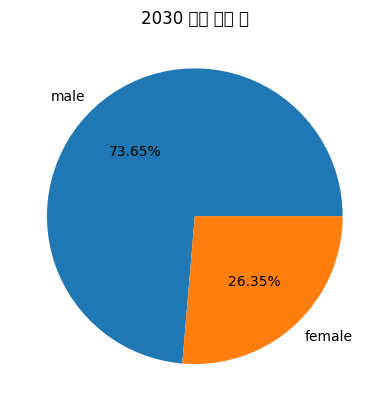

In [ ]:
labels = 'male', 'female'
sections = [422, 151]
#colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels,
        # startangle=180,
        # explode = (0, 0.1, 0),
        autopct = '%1.2f%%')
plt.title('2030 성별 인원 수')
plt.show()

In [ ]:

# dt_item_genre 에서 평점 갯수가 100개 이상인 것만 뽑아내기
df_rating_counts = df_data[['movie id', 'rating']].groupby(['movie id']).count()
df_item = df_item.merge(df_rating_counts, on = 'movie id')
df_item = df_item.rename(columns = {'rating' : 'rating_counts'})
df_item = df_item[df_item['rating_counts'] >= 100]



df_item_genre = df_item[['movie id', 'movie title', 'Action', 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',  'Sci-Fi',
              'Thriller', 'War', 'Western']]

rows = 338
cols = 1
genre_list = [[0 for j in range(cols)] for i in range(rows)]
df_item_genre[df_item_genre['movie id'] == 31]['Action']

k = 0
for i in df_item_genre['movie id']:
    genre_list[k].append(i)
    for j in ['movie title', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',  'Sci-Fi', 'Thriller', 'War', 'Western']:
        if df_item[df_item_genre['movie id'] == i][j][i-1] == 1:
            genre_list[k].append(j)
    k += 1




# genre_list를 데이터프레임(genre_df)로 만들고, 1번 컬럼을 movie id로 이름 바꾸기
genre_df = pd.DataFrame(genre_list)
genre_df = genre_df.rename(columns = {1 : 'movie id'})


df_item_genre = df_item_genre.merge(genre_df, on = 'movie id')[['movie id', 'movie title', 2, 3, 4, 5, 6, 7]]



# timestamp를 받아서 datetime으로 변환해주는 함수
def timestamp_to_datetime(x):
    return datetime.utcfromtimestamp(x)

# datime으로 year, month, day를 반환해주는 함수
def find_year(x):
    return x.year
def find_month(x):
    return x.month
def find_day(x):
    return x.day


# timestamp를 datetime로 변환시켜서 colum에 추가
df_data['datetime'] = df_data['timestamp'].apply(timestamp_to_datetime)


# df_data의 datetime으로부터 year, month, day를 추출하여 colum에 추가
df_data['date_year'] = df_data['datetime'].apply(find_year)
df_data['date_month'] = df_data['datetime'].apply(find_month)
df_data['date_day'] = df_data['datetime'].apply(find_day)



# date_month를 확인하여 spring, summer, fall, winter 구분해주는 함수
def find_season(x):
    if 3 <= x < 6:
        return 'spring'
    elif 6 <= x < 9:
        return 'summer'
    elif 9 <= x < 12:
        return 'fall'
    else:
        return 'winter'

# df_data의 date_month를 보고 spring, summer, fall, winter로 구분하여 season 컬럼에 추가
df_data['season'] = df_data['date_month'].apply(find_season)


# df_data에 user id를 보고 나잇대 추가하기
df_data = df_data.merge(df_user[['user id', 'age']], on = 'user id')


# df_data의 age를 확인하여 2030만 추려내기
df_data[(df_data['age'] >= 20) & (df_data['age'] <= 30)]
df_data_2030 = df_data[(df_data['age'] >= 20) & (df_data['age'] <= 30)]



# df_data에서 movie id별 rating 갯수
df_data_2030_rating_counts = df_data_2030[['movie id', 'rating']].groupby(['movie id']).count()
df_data_2030_rating_counts = df_data_2030_rating_counts.rename(columns = {'rating':'rating_counts'})


# df_data_2030에 movie id를 기준으로 각 movie id별 rating_counts 컬럼 추가
df_data_2030 = df_data_2030.merge(df_data_2030_rating_counts, on = 'movie id')


# 2030의 영화 평가 중에서, 각 영화당 평점 갯수가 100개 이상인 애들 추려보기
df_data_2030_rating_counts_100 = df_data_2030[df_data_2030['rating_counts'] >= 100]


# 2030이 평가한 영화의 평가 갯수가 100개 이상인 애들의 각 영화별 장르 컬럼 추가
df_data_2030_rating_counts_100_genre = df_data_2030_rating_counts_100.merge(df_item_genre, on = 'movie id')



# df_data_2030_rating_counts_100_genre에 영화별 평균 평점 넣어주기
df_data_2030_rating_counts_100_genre = df_data_2030_rating_counts_100_genre.merge(df_data_2030_rating_counts_100_genre[['movie id', 'rating']].groupby(['movie id']).mean(), on = 'movie id')
df_data_2030_rating_counts_100_genre = df_data_2030_rating_counts_100_genre.rename(columns = {'rating_y' : 'rating_avg'})
df_data_2030_rating_counts_100_genre = df_data_2030_rating_counts_100_genre.rename(columns = {'rating_x' : 'rating'})


df_data_2030_rating_counts_100_genre = df_data_2030_rating_counts_100_genre.merge(df_user[['user id', 'gender']], on = 'user id')



# 2030,평점갯수 100개이상 인 영화들의 장르를 0과 1로 나타낸 데이터프레임
df_data_2030_rating_counts_100_genre01 = df_data_2030_rating_counts_100_genre[['user id', 'gender', 'movie id','movie title', 'rating', 'season', 'rating_counts','rating_avg']].merge(df_item[['movie id', 'Action', 'Adventure', 'Animation',
               "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
               'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',  'Sci-Fi',
               'Thriller', 'War', 'Western']], on = 'movie id')





# 평가가 중복되더라도 장르를 하나씩 넣어서 인덱스 방향으로 추가시키기
# violin 그래프를 그리기 위함
df_fv = df_data_2030_rating_counts_100_genre01
genres = ['Action', 'Adventure', 'Animation',"Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
        'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',  'Sci-Fi',
               'Thriller', 'War', 'Western']
df_for_violin = pd.DataFrame(columns = ['user id', 'gender', 'movie id', 'movie title', 'rating', 'season', 'rating_counts', 'rating_avg', 'genre'])
for g in genres:
    d = df_fv[df_fv[g] == 1][['user id', 'gender', 'movie id', 'movie title', 'rating', 'season', 'rating_counts', 'rating_avg']]
    d.insert(8, 'genre', g)
    df_for_violin = pd.concat([df_for_violin, d])






# 바이올린 그래프 그리기
#------------------------------------------------------------------------------------------
fig = go.Figure()
fig.add_trace(go.Violin(x=df_for_violin['genre'][df_for_violin['gender'] == 'M'],
                        y=df_for_violin['rating'][ df_for_violin['gender'] == 'M' ],
                        legendgroup='Yes', scalegroup='Yes', name='Male',
                        side='negative',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df_for_violin['genre'][df_for_violin['gender'] == 'F'],
                        y=df_for_violin['rating'][ df_for_violin['gender'] == 'F' ],
                        legendgroup='No', scalegroup='No', name='Female',
                        side='positive',
                        line_color='red')
             )
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay')
fig.update_xaxes(range=[-1, 17])
fig.update_yaxes(range=[0, 7])
fig.update_xaxes(title_text='Genres')
fig.update_yaxes(title_text='Rating')
fig.update_layout(
    legend_yanchor="top",
    legend_y=0.99,
    legend_xanchor="left",
    legend_x=0.01
)
fig.update_layout(title_text="Ratings by genre For People in their 20s and 30s")
fig.show()
# x축은 장르
# y축은 장르별 점수 분포
# 파란색은 남성
# 빨간색은 여성
#------------------------------------------------------------------------------------------